In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from torch import optim
from torch import nn

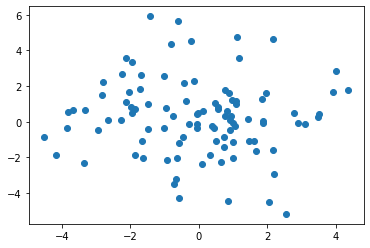

In [2]:
np.random.seed(47)

filas = 100
columnas = 2

data = np.random.randn(filas, columnas)*2
plt.scatter(data[:,0], data[:,1])

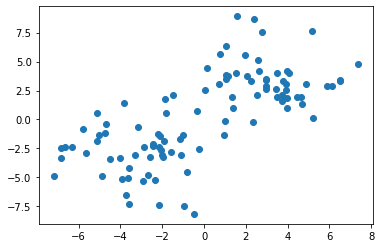

In [3]:
mitad = filas // 2
comodin = 3 * np.ones( (mitad, columnas) )

data[mitad:,:] = data[mitad:,:] + comodin
data[:mitad,:] = data[:mitad,:] - comodin

plt.scatter(data[:,0], data[:,1])

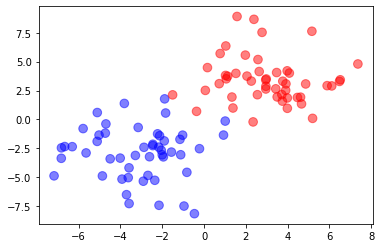

In [4]:
colors = ['blue', 'red']
color = np.array([ [ colors[0] ]*mitad + [ colors[1] ]*mitad ]).reshape(filas)

plt.scatter(data[:,0], data[:,1], s=75, alpha=0.5, c=color)


In [7]:
target = np.array( [0]*mitad + [1]*mitad ).reshape(filas, 1)

x = torch.from_numpy(data).float().requires_grad_(True)
y = torch.from_numpy(target).float()

0.04504481330513954


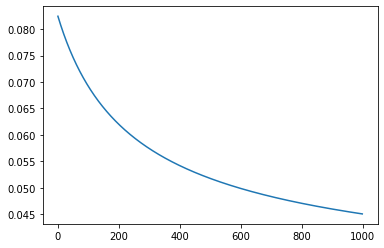

In [8]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid())

loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []
iterations = range(1000)

for i in iterations:
    pred = model(x)
    loss = loss_function(pred, y)
    losses.append(loss.data)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(float(loss))
plt.plot(iterations, losses)

In [10]:
blue = torch.Tensor( [[-4, -5]] )
red = torch.Tensor( [[4, 5]] )
mistery = torch.Tensor( [[0, 0]] )


prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

prediction = model(red).data[0][0] > 0.5
print(colors[prediction])

prediction = model(mistery).data[0][0] > 0.5
print(colors[prediction])


blue
red
blue
